In [1]:
### Example script to save ubar plots to file
import os
import sys
import glob
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

import sys
sys.path.insert(0,'..')

from plot_functions.plot_map import plot_map
from plot_functions.plot_ubar import plot_ubar_seasonal, plot_ubar_annual, plot_ubar_daily
from plot_functions.make_gif import make_gif

from clim_functions.mean_lat_weighted import mean_lat_weighted
from clim_functions.deseasonalize import deseasonalize

In [2]:
# Get T42 data
run = '039'
basedir = os.environ['SCRATCH']+'/MiMA/runs/'
rundir = basedir + run + '/'
print(rundir)

print(glob.glob(rundir+'*.nc'))
filename = 'atmos_daily'
dataset = nc.Dataset(rundir+filename+'.nc', 'r')

lonT42 = dataset['lon']
latT42 = dataset['lat']
timeT42 = dataset['time']
pfullT42 = dataset['pfull']
ucompT42 = dataset['ucomp']
gwfu_cgwdT42 = dataset['gwfu_cgwd']
gwfv_cgwdT42 = dataset['gwfv_cgwd']

/scratch/users/lauraman/MiMA/runs/039/
['/scratch/users/lauraman/MiMA/runs/039/atmos_daily.nc', '/scratch/users/lauraman/MiMA/runs/039/atmos_avg.nc', '/scratch/users/lauraman/MiMA/runs/039/atmos_avg2.nc', '/scratch/users/lauraman/MiMA/runs/039/atmos_daily2.nc']


In [3]:
# Get T62 data
run = 'highres'
basedir = os.environ['SCRATCH']+'/MiMA/runs/'
rundir = basedir + run + '/'
print(rundir)

print(glob.glob(rundir+'*.nc'))
filename = 'atmos_daily'
dataset = nc.Dataset(rundir+filename+'.nc', 'r')

lonT62 = dataset['lon']
latT62 = dataset['lat']
timeT62 = dataset['time']
pfullT62 = dataset['pfull']
ucompT62 = dataset['ucomp']
gwfu_cgwdT62 = dataset['gwfu_cgwd']
gwfv_cgwdT62 = dataset['gwfv_cgwd']

/scratch/users/lauraman/MiMA/runs/highres/
['/scratch/users/lauraman/MiMA/runs/highres/atmos_daily.nc']


In [4]:
print("T42: ", len(lonT42),"x", len(latT42))
print("T62: ", len(lonT62),"x", len(latT62))


T42:  128 x 64
T62:  192 x 94


## Check spin up

In [ ]:
# 10hPa

In [5]:
u_mean42 = mean_lat_weighted(ucompT42[:, 13, 30:34, :].mean(axis=-1), latT42[30:34], axis=(-1))
u_mean62 = mean_lat_weighted(ucompT62[:, 13, 30:34, :].mean(axis=-1), latT62[30:34], axis=(-1))

Text(0.5, 1.0, 'T62')

<Figure size 432x288 with 0 Axes>

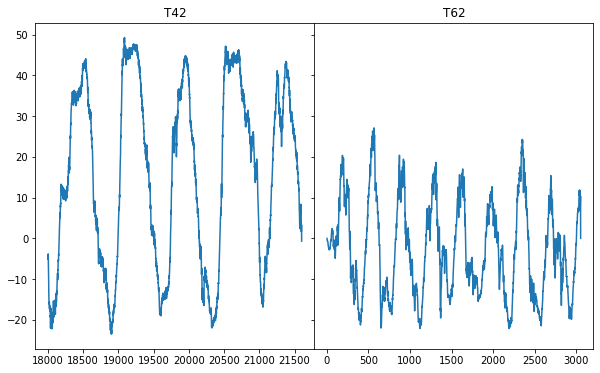

In [6]:
plt.clf()
fig, axs = plt.subplots(1, 2,figsize=(10, 6), gridspec_kw = {'wspace':0., 'hspace':0.}, sharey=True)
axs = axs.flatten()
plt.sca(axs[0])

plt.plot(timeT42[:], u_mean42)
plt.title('T42')

plt.sca(axs[1])
plt.plot(timeT62[:], u_mean62)
plt.title('T62')

In [8]:
# 100 hPa

In [9]:
u_mean42 = mean_lat_weighted(ucompT42[:, 22, 30:34, :].mean(axis=-1), latT42[30:34], axis=(-1))
u_mean62 = mean_lat_weighted(ucompT62[:, 22, 30:34, :].mean(axis=-1), latT62[30:34], axis=(-1))

Text(0.5, 1.0, 'T62')

<Figure size 432x288 with 0 Axes>

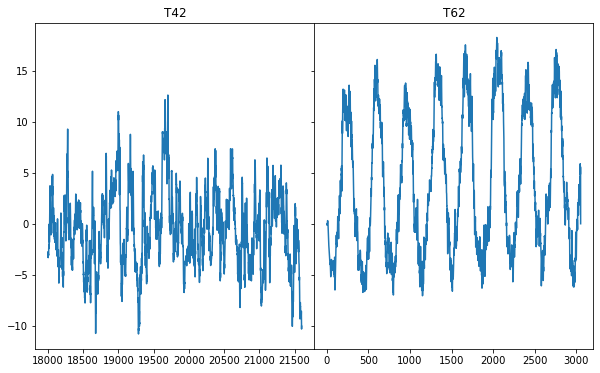

In [10]:
plt.clf()
fig, axs = plt.subplots(1, 2,figsize=(10, 6), gridspec_kw = {'wspace':0., 'hspace':0.}, sharey=True)
axs = axs.flatten()
plt.sca(axs[0])

plt.plot(timeT42[:], u_mean42)
plt.title('T42')

plt.sca(axs[1])
plt.plot(timeT62[:], u_mean62)
plt.title('T62')

## QBO

In [ ]:
# Plot contours of zonal mean wind speeds in 4degS-4degN region (inds 30-34)
u_zonal42 = mean_lat_weighted( ucompT42[:, :, 30:34, :].mean(axis=(-1)), latT42[30:34], axis=(-1) )
u_zonal62 = mean_lat_weighted( ucompT62[:, :, 30:34, :].mean(axis=(-1)), latT62[30:34], axis=(-1) )

t = time[:]

nrows = 2
ncols = 1

levels = np.linspace(-40, 40, 100)


plt.clf()
fig, axs = plt.subplots(nrows, ncols,figsize=(15, 6), gridspec_kw = {'wspace':0., 'hspace':0.}, sharey=True)
axs = axs.flatten()
plt.sca(axs[0])
plt.contourf(timeT42[:]-timeT42[0], pfullT42[:], u_zonal42.T, 
             cmap = 'BrBG_r', levels = levels, extend='both')
plt.ylabel('Pressure (hPa)')
plt.xlabel('Time (years)')
plt.title('T42')
plt.xticks(np.arange(360., len(time)+1, 360.), np.arange(1, int((len(time)+1)/360)+1 , 1))
axs.set_yscale('log')
axs.invert_yaxis()
cbar = plt.colorbar(ticks=np.arange(-20, 20.5, 20), location='bottom', label='m/s',
                    orientation='horizontal')

plt.sca(axs[0])
plt.contourf(timeT62[:]-timeT62[0], pfullT62[:], u_zonal62.T, 
             cmap = 'BrBG_r', levels = levels, extend='both')
plt.ylabel('Pressure (hPa)')
plt.xlabel('Time (years)')
plt.title('T62')
plt.xticks(np.arange(360., len(time)+1, 360.), np.arange(1, int((len(time)+1)/360)+1 , 1))
axs.set_yscale('log')
axs.invert_yaxis()
cbar = plt.colorbar(ticks=np.arange(-20, 20.5, 20), location='bottom', label='m/s',
                    orientation='horizontal')



## GW drag

In [ ]:
model_level = 23  # Close to 100 hPa
model_height = pfullT42[model_level]

In [ ]:
gwd_uT42 = gwfu_cgwdT42[:, model_level, :, :].mean(axis=0)
gwd_vT42 = gwfv_cgwdT42[:, model_level, :, :].mean(axis=0)

In [ ]:
nrows = 2
ncols = 2
levels = np.linspace(-2e-6, 2e-6, 100)

plt.clf()
fig, axs = plt.subplots(nrows, ncols,figsize=(16, 8), gridspec_kw = {'wspace':0.15, 'hspace':0.1}, 
                        subplot_kw={'projection': ccrs.PlateCarree()}, sharey=True)
axs = axs.flatten()
plt.sca(axs[0])
plot_map(lonT42[:], latT42[:], gwd_uT42, ax=axs[0], levels=levels, title='T42 gwd u ({:.2g} hPa)'.format(model_height))
plt.sca(axs[1])
plot_map(lonT42[:], latT42[:], gwd_vT42,  ax=axs[1], levels=levels, title='T42 gwd v ({:.2g} hPa)'.format(model_height))
#cbar = plt.colorbar(ax=axs[1], ticks=[-1e-4, -1e-6, 0, 1e-6, 1e-4], location='bottom', label='m/s^2',
#                   orientation='horizontal')

plt.sca(axs[0])
plot_map(lonT62[:], latT62[:], gwd_uT62, ax=axs[0], levels=levels, title='T62 gwd u ({:.2g} hPa)'.format(model_height))
plt.sca(axs[1])
plot_map(lonT62[:], latT62[:], gwd_vT62,  ax=axs[1], levels=levels, title='T62 gwd v ({:.2g} hPa)'.format(model_height))
#cbar = plt.colorbar(ax=axs[1], ticks=[-1e-4, -1e-6, 0, 1e-6, 1e-4], location='bottom', label='m/s^2',
#                   orientation='horizontal')


In [ ]:
# Plot contours of zonal mean drag in 4degS-4degN region (inds 30-34)
gwdu_zonalT42 = mean_lat_weighted( gwfu_cgwdT42[:, :, 30:34, :].mean(axis=(-1)), latT42[30:34], axis=(-1) )
t = time[:]

nrows = 1
ncols = 1

levels = np.linspace(-40, 40, 100)


plt.clf()
fig, axs = plt.subplots(nrows, ncols,figsize=(10, 6), gridspec_kw = {'wspace':0., 'hspace':0.}, sharey=True)

plt.contourf(time[:]-time[0], pfull[:], u_zonal.T, 
             cmap = 'BrBG_r', levels = levels, extend='both')
plt.ylabel('Pressure (hPa)')
plt.xlabel('Time (years)')
plt.xticks(np.arange(360., len(time)+1, 360.), np.arange(1, int((len(time)+1)/360)+1 , 1))
axs.set_yscale('log')
axs.invert_yaxis()
cbar = plt.colorbar(ticks=np.arange(-20, 20.5, 20), location='bottom', label='m/s',
                    orientation='horizontal')

## Plot mean u at different heights 

In [ ]:
model_heights = ['10hPa', '40hPa', '100hPa', '200hPa', '850hPa']
model_levels = [13, 19, 23, 28, 37]

nrows = len(model_heights)
ncols = 2
fig, axs = plt.subplots(nrows, ncols, figsize=(16, 8*nrows), gridspec_kw = {'wspace':0.05, 'hspace':0.05}, 
                        subplot_kw={'projection': ccrs.PlateCarree()}, sharex = True)

for i in range(len(model_heights)):
    # Plot T42 
    u_plot42 = ucompT42[360:, model_levels[i], :, :].mean(axis=0)

    plot_map(lonT42, latT42, u_plot42, ax=axs[i, 0], levels = np.linspace(-30, 30, 100), 
             title = 'T42 u {}'.format(model_heights[i]))
    # Plot T62
    u_plot62 = ucompT62[360:, model_levels[i], :, :].mean(axis=0)
    
    plot_map(lonT62, latT62, u_plot62, ax=axs[i, 1], levels = np.linspace(-30, 30, 100), 
             title = 'T62 u {}'.format(model_heights[i]))

cbar = plt.colorbar(ax=axs, ticks=np.arange(-20, 20.5, 10), location='bottom', label='m/s',
                        orientation='horizontal')


## Zonal mean winds

In [ ]:
plot_ubar_annual(lat, pfull, ucomp)
plt.show()

In [ ]:
plot_ubar_seasonal(lat, pfull, ucomp, rundir)
plt.show()